In [0]:
import numpy as np
import tabulate as tb
import matplotlib.pyplot as plt

class Triqui():
    tablero = None
    tableros_indiv = None
    pos_disponibles = None
    resultado = None
    jugadas = None
    traza_ganadora = None
        
    def recargar_variables(self):
        self.tablero = [["1","2","3"],["4","5","6"],["7","8","9"]]
        self.tableros_indiv = {"X": np.zeros((3,3)),"O": np.zeros((3,3))}
        self.pos_disponibles = {0: [0,1,2], 1: [0,1,2], 2: [0,1,2]}
        self.resultado = "La partida ha terminado en empate."
        self.jugadas = 0
        self.traza_ganadora = None
    
    def asignar_traza_ganadora(self, tipo):
        elementos = tipo.split("-")
        if "F" in elementos:
            y = abs(2 - int(elementos[1])) + 0.5
            self.traza_ganadora = [[0.25,2.75],[y,y]]
        elif "C" in elementos:
            x = int(elementos[1]) + 0.5
            self.traza_ganadora = [[x,x],[0.25,2.75]]
        elif "D" in elementos:
            id_diagonal = int(elementos[1])
            if id_diagonal == 2:
                self.traza_ganadora = [[0.25,2.75],[0.25,2.75]]
            else:
                self.traza_ganadora = [[0.25,2.75],[2.75,0.25]]            
    
    def mostrar_tablero(self):
        for i in range(len(self.tablero)):
            for j in range(len(self.tablero[0])):
                item = self.tablero[i][j]
                if item == "X" or item == "O":
                    plt.plot((j + 0.5),abs(2.5-i),'b'+(item.lower()),ms=15)
                else:
                    plt.text((j + 0.5),abs(2.5-i), item, fontsize=15, color="#9c9c9c")
        plt.step([0.25,2.75],[1,1],color="black")
        plt.step([0.25,2.75],[2,2],color="black")
        plt.step([1,1],[0.25,2.75],color="black")
        plt.step([2,2],[0.25,2.75],color="black")
        if self.traza_ganadora != None:
            plt.plot(self.traza_ganadora[0],self.traza_ganadora[1],color="red")
        plt.xlim(0,3)
        plt.ylim(0,3)
        plt.xticks([]) 
        plt.yticks([])
        plt.show()    
            
    def verificar_disponibilidad(self, pos):
        x = pos[0]
        y = pos[1]
        ys = self.pos_disponibles.get(x, None)
        if ys != None:
            if y in ys:
                return True
        return False
    
    def validar_posibles_ganadas(self, tablero):
        retorno = []
        posibles_columnas = { 0: [0,1,2], 1: [0,1,2], 2: [0,1,2] }
        posible_diagonal = []
        posible_diagonal_2 = []
        for i in range(len(tablero)):
            fila = np.array(tablero[i].copy())
            pos = np.where(fila == 0)[0]
            aux = {0,1,2}
            pos_1 = list(aux.difference(pos))
            if len(pos) == 1:
                j = pos[0]
                if self.verificar_disponibilidad([i, j]):
                    retorno.append([i, j, ("F-" + str(i))])
            if len(pos_1) >= 1:
                for j in pos_1:
                    posibles_columnas[j].remove(i)
            if i in pos:
                posible_diagonal.append([i,i,("D-" + str(1))])
            if abs(i-2) in pos:
                posible_diagonal_2.append([i,abs(i-2),("D-" + str(2))])
        if len(posible_diagonal) == 1:
            if self.verificar_disponibilidad(posible_diagonal[0]):
                retorno.append(posible_diagonal[0])
        if len(posible_diagonal_2) == 1:
            if self.verificar_disponibilidad(posible_diagonal_2[0]):
                retorno.append(posible_diagonal_2[0])        
        if len(posibles_columnas[0]) == 1:
            if self.verificar_disponibilidad([posibles_columnas[0][0],0]):
                retorno.append([posibles_columnas[0][0],0,("C-" + str(0))])
        if len(posibles_columnas[1]) == 1:
            if self.verificar_disponibilidad([posibles_columnas[1][0],1]):
                retorno.append([posibles_columnas[1][0],1,("C-" + str(1))])
        if len(posibles_columnas[2]) == 1:
            if self.verificar_disponibilidad([posibles_columnas[2][0],2]):
                retorno.append([posibles_columnas[2][0],2,("C-" + str(2))])
        return retorno
    
    def asignar_posicion(self, jugador, x, y):
        self.tablero[x][y] = jugador
        self.tableros_indiv[jugador][x][y] = 1
        self.pos_disponibles[x].remove(y)
        if len(self.pos_disponibles[x]) == 0:
            self.pos_disponibles.pop(x)
        self.jugadas += 1
        
    def buscar_posicion_disponible(self):
        xs = list(self.pos_disponibles.keys())
        x = xs[np.random.randint(len(xs), size=1)[0]]
        ys = self.pos_disponibles[x]
        y = ys[np.random.randint(len(ys), size=1)[0]]
        return [x, y]

    def humano(self):
        self.mostrar_tablero()
        terminar = False
        posibles_posiciones = {1: [0,0], 2: [0,1], 3: [0,2], 4: [1,0], 5: [1,1],
                               6: [1,2], 7: [2,0], 8: [2,1], 9: [2,2]}
        retorno = None
        
        while not terminar:
            opc = input("Por favor seleccione una posición:")
            try:
                opc = int(opc)
                if opc in posibles_posiciones.keys():
                    flag = self.verificar_disponibilidad(posibles_posiciones[opc])
                    if flag:
                        retorno = posibles_posiciones[opc]
                        terminar = True
                    else:
                        print("La posición seleccionada no esta disponible.")
                else:
                    raise ValueError
            except ValueError:
                print("¡ERROR! Por favor digite una posición valida.")        
        return retorno            
    
    def maquina(self, jugador, siguiente_jugador, humano):
        if not humano:
            self.mostrar_tablero()
        ganadas_mias = self.validar_posibles_ganadas(self.tableros_indiv[jugador])
        if ganadas_mias:
                x = ganadas_mias[0][0]
                y = ganadas_mias[0][1]
                self.asignar_posicion(jugador, x, y)
                self.resultado = "El jugador {} ha ganado la partida.".format(jugador)
                self.asignar_traza_ganadora(ganadas_mias[0][2])
                self.jugadas = 9
        ganadas_otro = self.validar_posibles_ganadas(self.tableros_indiv[siguiente_jugador])
        if ganadas_otro:
            x = ganadas_otro[0][0]
            y = ganadas_otro[0][1]
            self.asignar_posicion(jugador, x, y)
            if (not humano) and (len(ganadas_otro)) > 1:
                x = ganadas_otro[1][0]
                y = ganadas_otro[1][1]
                self.asignar_posicion(siguiente_jugador, x, y)
                self.resultado = "El jugador {} ha ganado la partida.".format(siguiente_jugador)
                self.asignar_traza_ganadora(ganadas_otro[1][2])
                self.jugadas = 9
        else:
            pos = self.buscar_posicion_disponible()
            x = pos[0]
            y = pos[1]
            self.asignar_posicion(jugador, x, y)
    
    def jugar(self, humano):
        self.recargar_variables()
        jugador = "X"
        siguiente_jugador = "O"
        while self.jugadas<9:
            if humano:
                ganadas_mias = self.validar_posibles_ganadas(self.tableros_indiv[jugador])
                pos_seleccionada = self.humano()
                x = pos_seleccionada[0]
                y = pos_seleccionada[1]
                self.asignar_posicion(jugador, x, y)
                if ganadas_mias:
                    ganadas_copia = np.array(ganadas_mias.copy())[0:,0:2].tolist()
                    aux = [str(x), str(y)]
                    if aux in ganadas_copia:
                        self.resultado = "Haz ganado la partida!!!.".format(jugador)
                        indice = ganadas_copia.index(aux)
                        self.asignar_traza_ganadora(ganadas_mias[indice][2])
                        break
                if self.jugadas == 9:
                    break
                aux = jugador
                jugador = siguiente_jugador
                siguiente_jugador = aux
            self.maquina(jugador, siguiente_jugador, humano)
            aux = jugador
            jugador = siguiente_jugador
            siguiente_jugador = aux
        self.mostrar_tablero()
        print(self.resultado)

### 1. JUEGO TRIQUI: MÁQUINA VS MÁQUINA

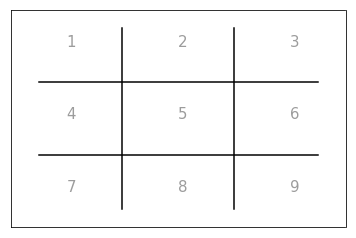

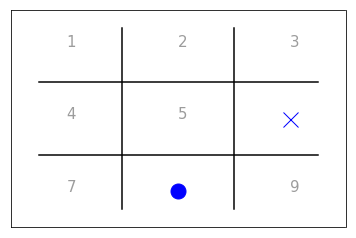

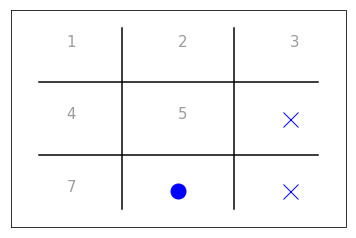

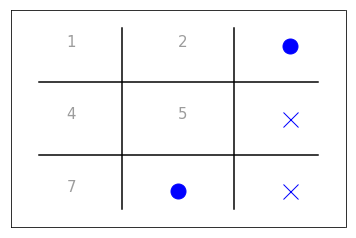

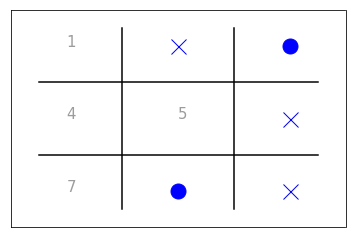

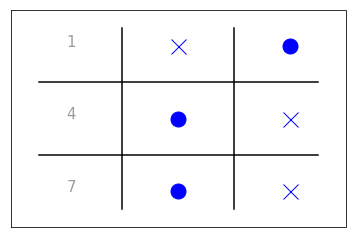

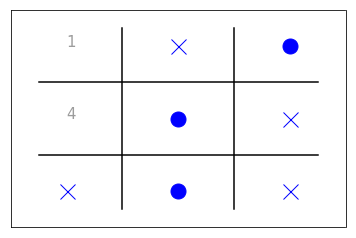

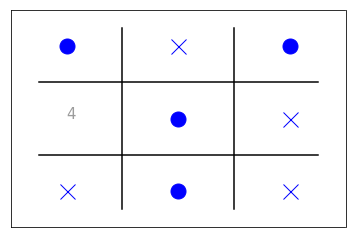

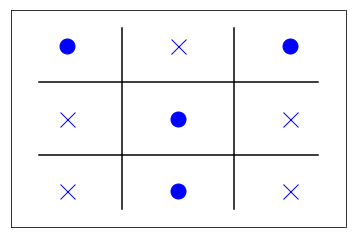

La partida ha terminado en empate.


In [16]:
juego = Triqui()
juego.jugar(humano=False)

### 2. JUEGO TRIQUI: HUMANO VS MÁQUINA

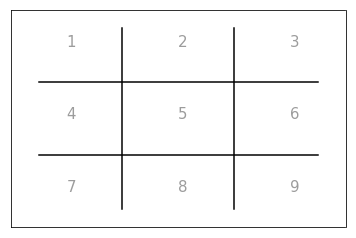

Por favor seleccione una posición:5


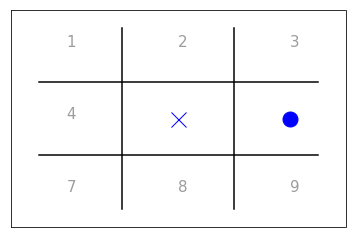

Por favor seleccione una posición:3


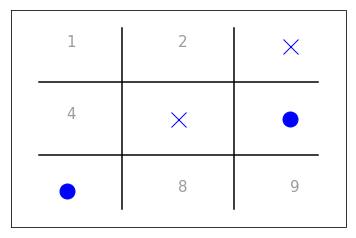

Por favor seleccione una posición:3
La posición seleccionada no esta disponible.
Por favor seleccione una posición:9


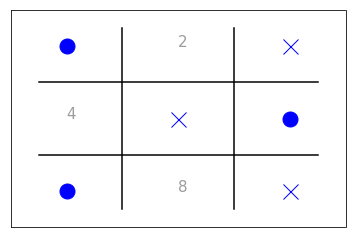

Por favor seleccione una posición:1
La posición seleccionada no esta disponible.
Por favor seleccione una posición:4


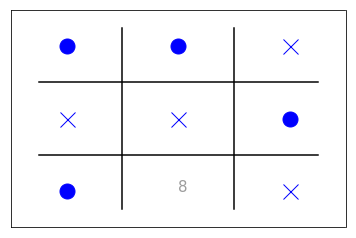

Por favor seleccione una posición:8


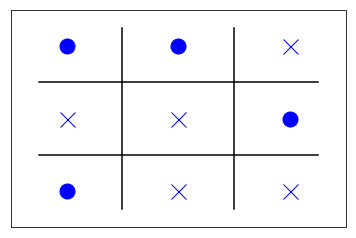

La partida ha terminado en empate.


In [10]:
juego = Triqui()
juego.jugar(humano=True)